## 27.read_htmlによるデータの取得と表示

### Pandas read_html
- 指定されたURL上の表(tableタグ)を取得する

In [2]:
# pandasをインポート
import pandas as pd

In [3]:
url='https://finance.yahoo.com/quote/AAPL/history?p=AAPL'

In [4]:
# データを取得,データはlistに格納される
data = pd.read_html(url, header=0)

In [9]:
# 先頭の5行を表示
data[0].head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Aug 14, 2020",459.32,460.00,452.18,459.63,459.63,41391302
1,"Aug 13, 2020",457.72,464.17,455.71,460.04,460.04,52420000
2,"Aug 12, 2020",441.99,453.10,441.19,452.04,452.04,41486200
3,"Aug 11, 2020",447.88,449.93,436.43,437.50,437.50,46975600
4,"Aug 10, 2020",450.40,455.10,440.00,450.91,450.91,53100900


In [10]:
# 末尾の5行を表示
data[0].tail()

,Date,Open,High,Low,Close*,Adj Close**,Volume
96,"Apr 01, 2020",246.50,248.72,239.13,240.91,239.83,44054600
97,"Mar 31, 2020",255.60,262.49,252.00,254.29,253.15,49250500
98,"Mar 30, 2020",250.74,255.52,249.40,254.81,253.66,41994100
99,"Mar 27, 2020",252.75,255.87,247.05,247.74,246.63,51054200
100,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...


## 28. 取得データの変換1(数値)

In [12]:
# 文字列を数値型に変換、エラー発生時(数値に変換できないもの）はNaNとする(errors='coerce')
data[0]['Adj Close**'] = pd.to_numeric(data[0]['Adj Close**'],errors='coerce')

In [14]:
data[0].tail()

,Date,Open,High,Low,Close*,Adj Close**,Volume
96,"Apr 01, 2020",246.50,248.72,239.13,240.91,239.83,44054600
97,"Mar 31, 2020",255.60,262.49,252.00,254.29,253.15,49250500
98,"Mar 30, 2020",250.74,255.52,249.40,254.81,253.66,41994100
99,"Mar 27, 2020",252.75,255.87,247.05,247.74,246.63,51054200
100,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,NaN,*Close price adjusted for splits.**Adjusted cl...


In [15]:
# 欠損値を削除（NaN)を削除
data[0].dropna(inplace=True)

In [17]:
data[0].tail()

,Date,Open,High,Low,Close*,Adj Close**,Volume
95,"Apr 02, 2020",240.34,245.15,236.90,244.93,243.83,41483500
96,"Apr 01, 2020",246.50,248.72,239.13,240.91,239.83,44054600
97,"Mar 31, 2020",255.60,262.49,252.00,254.29,253.15,49250500
98,"Mar 30, 2020",250.74,255.52,249.40,254.81,253.66,41994100
99,"Mar 27, 2020",252.75,255.87,247.05,247.74,246.63,51054200


## 29. 取得データの変換2(日付)

In [18]:
# 文字列を日付型に変換にはdatetime.strptime(文字列、日付の書式)
# 日付の書式は変換する文字列がどのような書式で書かれているかを指定

from datetime import datetime as dt

In [21]:
# リスト内包表記でfor文から取得した要素をリストに格納する
data[0]['Date2'] = [dt.strptime(i, '%b %d, %Y') for i in data[0]['Date']]

In [23]:
data[0]['Date2']

0    2020-08-14
1    2020-08-13
2    2020-08-12
3    2020-08-11
4    2020-08-10
        ...    
95   2020-04-02
96   2020-04-01
97   2020-03-31
98   2020-03-30
99   2020-03-27
Name: Date2, Length: 98, dtype: datetime64[ns]

In [24]:
data[0].head()

,Date,Open,High,Low,Close*,Adj Close**,Volume,Date2
0,"Aug 14, 2020",459.32,460.00,452.18,459.63,459.63,41391302,2020-08-14
1,"Aug 13, 2020",457.72,464.17,455.71,460.04,460.04,52420000,2020-08-13
2,"Aug 12, 2020",441.99,453.10,441.19,452.04,452.04,41486200,2020-08-12
3,"Aug 11, 2020",447.88,449.93,436.43,437.50,437.50,46975600,2020-08-11
4,"Aug 10, 2020",450.40,455.10,440.00,450.91,450.91,53100900,2020-08-10


## 30. 株価グラフの描画

In [29]:
# Date2をindexに変更する
data[0].set_index('Date2', inplace=True)

In [30]:
# dfで確認
data[0].head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
Date2,,,,,,,
2020-08-14,"Aug 14, 2020",459.32,460.00,452.18,459.63,459.63,41391302
2020-08-13,"Aug 13, 2020",457.72,464.17,455.71,460.04,460.04,52420000
2020-08-12,"Aug 12, 2020",441.99,453.10,441.19,452.04,452.04,41486200
2020-08-11,"Aug 11, 2020",447.88,449.93,436.43,437.50,437.50,46975600
2020-08-10,"Aug 10, 2020",450.40,455.10,440.00,450.91,450.91,53100900


In [34]:
# Adj Close**が数値型になっているか確認
data[0]['Adj Close**'].dtype

dtype('float64')

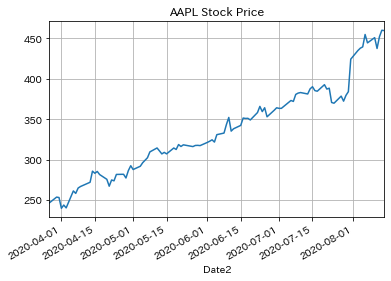

In [39]:
# グラフを描画
data[0]['Adj Close**'].plot(title='AAPL Stock Price',grid=True)

## 31. 株価データの保存

In [40]:
data[0].to_csv('AAPL_Stock.csv')